In [80]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm

In [81]:
DATADIR = "/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Training_Dataset"

In [82]:
Normal_Path = os.path.join(DATADIR, 'Normal')
Retinopathy_Path = os.path.join(DATADIR,'Diabetic_Retinopathy')

In [83]:
#Number in Normal
Normal_names = os.listdir(Normal_Path)
print(len(Normal_names))
print(Normal_names[:10])

1984
['2342_left.jpg', '2343_left.jpg', '940_right.jpg', '859_left.jpg', '2547_right.jpg', '1117_left.jpg', '3010_left.jpg', '2895_right.jpg', '3_left.jpg', '3011_left.jpg']


In [84]:
#Number in Diabetic Retinopathy
DR_names = os.listdir(Retinopathy_Path)
print(len(DR_names)) #More class weights here
print(DR_names[:10])

1679
['4227_right.jpg', '1402_right.jpg', '4011_right.jpg', '4361_right.jpg', '492_right.jpg', '4484_left.jpg', '735_left.jpg', '4631_right.jpg', '4142_left.jpg', '4324_left.jpg']


In [85]:
import os
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [86]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        DATADIR,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels, whilll change in transfer learning4
        class_mode='binary')

print(train_generator[0][0])

Found 8714 images belonging to 8 classes.
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [

In [87]:
img = Retinopathy_Path+"/01_dr.jpg"
img

'/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Training_Dataset/Diabetic_Retinopathy/01_dr.jpg'

In [88]:
img_array = cv2.imread(img ,cv2.IMREAD_UNCHANGED)  # Specifying color for Leukoscognosis iterating
#print(type(img_array))
# Specifying color for Leukoscognosis iterating
new_array = cv2.resize(img_array, (150, 150)) 

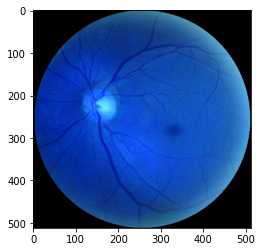

In [89]:
CATEGORIES = ["Normal","Diabetic_Retinopathy"]

for category in CATEGORIES:  # creating for loop to iterate over categories
    path = os.path.join(DATADIR,category)  # create acessble path to dataset
    for img in os.listdir(path):  # For loop inside a for loop to iterate and specify conditions for specifc images
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)  # convert to array
        plt.imshow(img_array)  # graph it using matplotlive
        plt.show()  # display

        break  #Ending for loop
    break

In [90]:
print(img_array.shape)

(512, 512, 3)


In [91]:
IMG_SIZE = 150
CATEGORIES = ["Normal","Diabetic_Retinopathy"]
def create_training_data():
    training_data = []
    for category in CATEGORIES:  
        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=Leukemia, 1=Healthy
        Normal_Path = os.path.join(DATADIR, 'Normal')
        Retinopathy_Path = os.path.join(DATADIR,'Diabetic_Retinopathy')

        for img in os.listdir(path):  # iterate over each of the classes
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_UNCHANGED)  # Specifying color for Leukoscognosis iterating
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # training data, new numpyarray
            except Exception as e: 
                print(e)
                pass
    return training_data

In [92]:
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category) 
    print(path)
    print(os.listdir(path))

/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Training_Dataset/Normal
['2342_left.jpg', '2343_left.jpg', '940_right.jpg', '859_left.jpg', '2547_right.jpg', '1117_left.jpg', '3010_left.jpg', '2895_right.jpg', '3_left.jpg', '3011_left.jpg', '2771_right.jpg', '2401_right.jpg', '2616_left.jpg', '2637_right.jpg', '734_left.jpg', '2617_left.jpg', '3082_left.jpg', '3227_right.jpg', '52_left.jpg', '3083_left.jpg', '3011_right.jpg', '1014_right.jpg', '2872_left.jpg', '951_left.jpg', '1478_right.jpg', '751_right.jpg', '798_right.jpg', '2873_left.jpg', '950_left.jpg', '3157_right.jpg', '2960_right.jpg', '3119_left.jpg', '2367_right.jpg', '2826_right.jpg', '2579_left.jpg', '2439_left.jpg', '1590_left.jpg', '2235_right.jpg', '2438_left.jpg', '2832_right.jpg', '2373_right.jpg', '3059_left.jpg', '88_left.jpg', '2974_right.jpg', '3058_left.jpg', '3143_right.jpg', '810_left.jpg', '2933_left.jpg', '1146_right.jpg', '2932_left.jpg', '329_righ

In [93]:
training_data = create_training_data()  

In [94]:
len(training_data)

3663

In [97]:
import random

random.shuffle(training_data)
#Shuffling the data in order to ensure that the machine does not learn just Leukemia or White BLood cells. Allows for a variety in data.
#Shuffles the new training data created, is a mutable list, meaning it can be changed
for sample in training_data[:10]: #Printed out 10 samples
    print(sample[1])

0
1
1
0
1
0
0
0
0
1


In [98]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)   
y = np.array(y) 
X.shape, y.shape
#X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
#X.shape, y.shape

((3663, 150, 150, 3), (3663,))

In [99]:
y.sum()

1679

In [100]:
X.shape[1:]

(150, 150, 3)

In [101]:
y.shape

(3663,)

In [102]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nReached 95% accuracy so cancelling training!")
            
            self.model.stop_training = True


In [105]:
from tensorflow.keras.optimizers import Adam

In [211]:
#Runing this one
callbacks = myCallback()

tf.compat.v1.random.set_random_seed(1234)
model = tf.keras.models.Sequential([
    
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolutio
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=X.shape[1:]), #input_shape=X.shape[1:]
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001,amsgrad=True),
              metrics=['accuracy'])

In [ ]:
# callbacks = myCallback()#Stops model training at 93%

# tf.compat.v1.random.set_random_seed(1234)  #This line of code inatlized the weights of the firs tmodel
# #So it is not 0. If model weights are 0 it won't train coreclty after each iteration
# #Starting with a random see drandom--> Remember there is pseudoe rndomness
# #Random seed with rndom even number: 
# model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolutio
#     #tf.keras.layers.BatchNormalization(input_shape=X.shape[1:]),
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=X.shape[1:], padding='same'), #input_shape=X.shape[1:]
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     #Fifth convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.2), #The Dropout layer randomly sets input 
#     #units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting
#     #Dropout technique works by randomly reducing the number of interconnecting neurons within a neural network.
#     #This keeps voerfiting. In this case it is around 20%
#     # 512 neuron hidden layera
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# model.compile(loss='binary_crossentropy',
#               optimizer=Adam(learning_rate=0.0001,amsgrad=True),
#               metrics=[tf.keras.metrics.AUC(),'accuracy']) #tf.metrics.AUC, Area under the Curve
# # AUC represents the probability that a random positive (green) example is positioned to the right of a random negative (red) example. AUC ranges in value from 0 to 1.
# # A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0
# #helps with false positives and negtives



In [178]:
#figure out wich model to use

In [179]:
# from tensorflow.keras.datasets import cifar10
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras.optimizers import Adam

In [180]:
class_weight = {0: 1.,
                1: 10.}

In [181]:
print(X.dtype)

float32


In [182]:
X = X.astype('float32') 
print(X.dtype)

float32


In [183]:
history = model.fit(X, y, batch_size=32, epochs=75, validation_split=0.15, class_weight=class_weight, callbacks= [callbacks])

Epoch 1/75
98/98 [==============================] - 56s 560ms/step - loss: 2.2992 - accuracy: 0.4570 - val_loss: 1.4726 - val_accuracy: 0.4582
Epoch 2/75
98/98 [==============================] - 56s 570ms/step - loss: 1.7498 - accuracy: 0.4557 - val_loss: 1.3030 - val_accuracy: 0.4582
Epoch 3/75
98/98 [==============================] - 52s 531ms/step - loss: 1.7240 - accuracy: 0.4531 - val_loss: 1.1459 - val_accuracy: 0.4582
Epoch 4/75
98/98 [==============================] - 56s 568ms/step - loss: 1.6860 - accuracy: 0.4621 - val_loss: 1.0440 - val_accuracy: 0.4582
Epoch 5/75
98/98 [==============================] - 57s 579ms/step - loss: 1.7109 - accuracy: 0.4460 - val_loss: 1.3104 - val_accuracy: 0.4582
Epoch 6/75
98/98 [==============================] - 54s 555ms/step - loss: 1.7363 - accuracy: 0.4413 - val_loss: 1.1697 - val_accuracy: 0.4582
Epoch 7/75
98/98 [==============================] - 54s 549ms/step - loss: 1.6749 - accuracy: 0.4495 - val_loss: 1.0600 - val_accuracy: 0.4582

In [184]:
model.save('normalversusdiabeteretinopathy') 

INFO:tensorflow:Assets written to: normalversusdiabeteretinopathy/assets


In [154]:
#only run after  

In [258]:
from tensorflow.keras.models import load_model
# load model
model = load_model('normalversusdiabeteretinopathy')

In [259]:
#only run after
#normalversusdiabeteretinopathy


<function matplotlib.pyplot.show(close=None, block=None)>

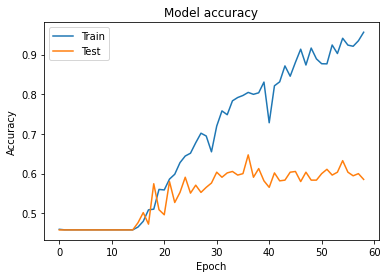

In [260]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import tqdm as tqdm
#Utlizing matplotlib to graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show

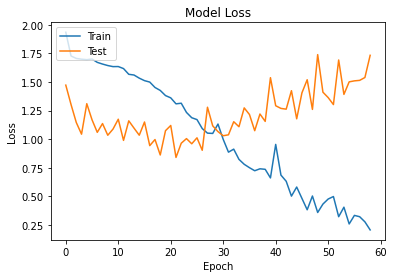

In [261]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import cv2
import tqdm as tqdm
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'],loc='upper left')
plt.show()

In [220]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, 150, 150, 3)       12        
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 74, 74, 64)        18496     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 18, 18, 64)       

In [221]:
#Test
TEST = '/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset'
normal_test="/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/normalTest"
# dr_test = os.path.join(TEST, 'diabetesTest')
# normal_test = os.path.join(TEST, 'normalTest')
normal_test

'/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/normalTest'

In [222]:
dr_test = '/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/diabetesTest'
dr_test


'/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/diabetesTest'

In [223]:
print(len(os.listdir(normal_test)))
print(len(os.listdir(dr_test))) # dr test

832
10


In [224]:
IMG_SIZE = 150
CATEGORIES = ["normalTest","diabetesTest"]
def create_test_data():
    test_data = []
    for category in CATEGORIES:  
        path = os.path.join(TEST,category)  
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=Leukemia, 1=Healthy
        dr_test = os.path.join(TEST, 'diabetesTest')
        normal_test = os.path.join(TEST, 'normalTest')
        
#         for item in os.listdir(path):
#             if item.startswith('.') and not os.path.isfile(os.path.join(path, item)):
#                 path.remove(item)
                
        for img in os.listdir(path):  # iterate over each of the classes
            try:
                #print(os.path.join(path,img))
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_UNCHANGED) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                test_data.append([new_array, class_num])  # training data, new numpyarray
            except Exception as e: 
                print(e)
                print(os.path.join(path,img))
                pass
    return test_data

In [225]:
test_data = create_test_data()

OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-oe0iat4a/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/normalTest/normalvdiabetes
OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-oe0iat4a/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/normalTest/.DS_Store


In [226]:
Z = [] #testing data
v = [] #lables
#fix this 

for features,label in training_data:
    Z.append(features)
    v.append(label)
Z = np.array(Z)   
v = np.array(v) 
Z.shape, v.shape
#X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
#X.shape, y.shape 

((3663, 150, 150, 3), (3663,))

In [227]:
model.evaluate(Z,v)

115/115 [==============================] - 16s 138ms/step - loss: 0.4037 - accuracy: 0.8881


[0.40365371108055115, 0.8880698680877686]

In [228]:
#Convolutions, and feature idneitifiedrs45


import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:2]]





In [229]:
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
normal_file = [os.path.join(Normal_Path, f) for f in Normal_names]
dr_file = [os.path.join(Retinopathy_Path, f) for f in DR_names]
img_path = random.choice(normal_file + dr_file)
print(img_path)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

t   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
print(t.shape)
t   = t.reshape((1,) + t.shape)                   # Numpy array with shape (1, 150, 150, 3)
print(t.shape)

# Rescale by 1/255
t /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(t)

#print(successive_feature_maps)



/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Training_Dataset/Normal/3176_left.jpg
(150, 150, 3)
(1, 150, 150, 3)


In [230]:
layer_names = [layer.name for layer in model.layers]
print(layer_names)

['batch_normalization_4', 'conv2d_54', 'max_pooling2d_48', 'conv2d_55', 'max_pooling2d_49', 'conv2d_56', 'max_pooling2d_50', 'conv2d_57', 'max_pooling2d_51', 'conv2d_58', 'max_pooling2d_52', 'conv2d_59', 'max_pooling2d_53', 'conv2d_60', 'max_pooling2d_54', 'flatten_8', 'dropout_6', 'dense_32', 'dense_33', 'dense_34', 'dense_35']


(1, 148, 148, 32)
(1, 74, 74, 32)
(1, 74, 74, 64)
(1, 37, 37, 64)


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide


(1, 37, 37, 64)
(1, 18, 18, 64)
(1, 18, 18, 128)
(1, 9, 9, 128)
(1, 9, 9, 512)
(1, 4, 4, 512)
(1, 4, 4, 128)
(1, 2, 2, 128)
(1, 2, 2, 64)
(1, 1, 1, 64)
(1, 64)
(1, 64)
(1, 512)
(1, 256)
(1, 64)
(1, 1)


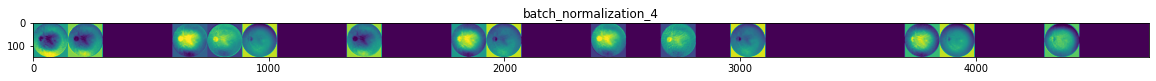

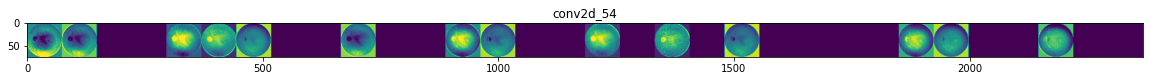

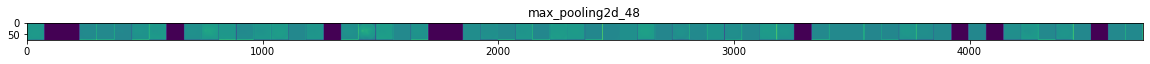

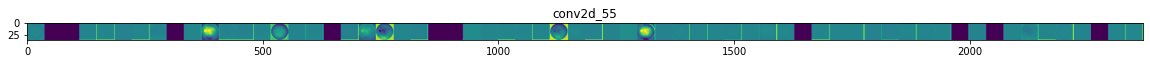

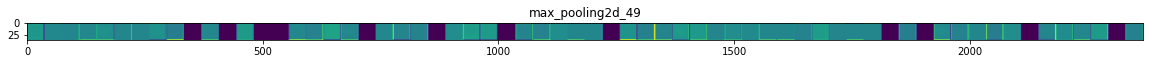

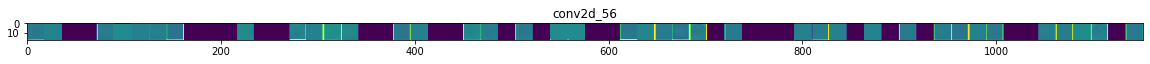

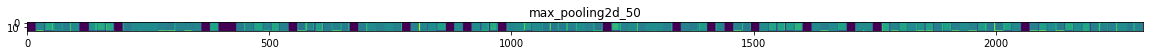

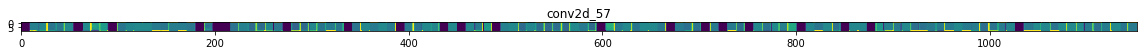

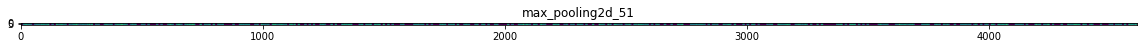

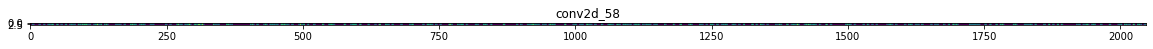

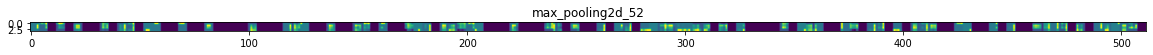

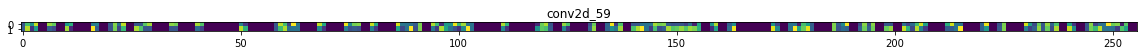

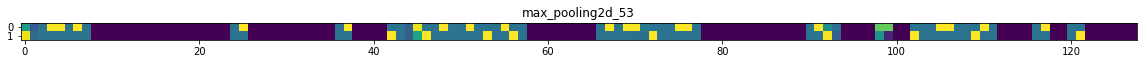

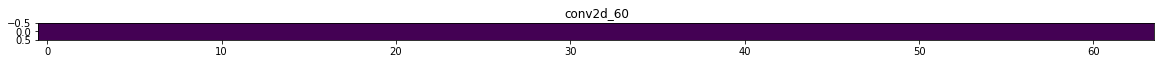

In [231]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a glaucoma 4from the training set.
normal_file = [os.path.join(Normal_Path, f) for f in Normal_names]
dr_file = [os.path.join(Retinopathy_Path, f) for f in DR_names]
img_path = random.choice(normal_file + dr_file)


img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

m   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
m   = m.reshape((1,) + m.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
m /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(m)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      m = feature_map[0, :, :, i]
      m -= m.mean()
      m /= m.std ()
      m *=  64
      m += 128
      m  = np.clip(m, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = m # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

(1, 148, 148, 32)
(1, 74, 74, 32)
(1, 74, 74, 64)
(1, 37, 37, 64)
(1, 37, 37, 64)
(1, 18, 18, 64)
(1, 18, 18, 128)
(1, 9, 9, 128)
(1, 9, 9, 512)


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


(1, 4, 4, 512)
(1, 4, 4, 128)
(1, 2, 2, 128)
(1, 2, 2, 64)
(1, 1, 1, 64)
(1, 64)
(1, 64)
(1, 512)
(1, 256)
(1, 64)
(1, 1)


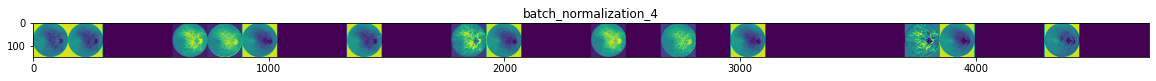

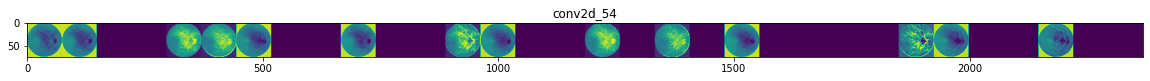

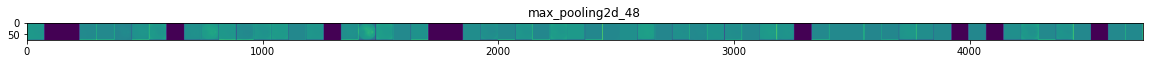

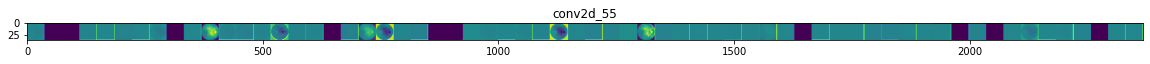

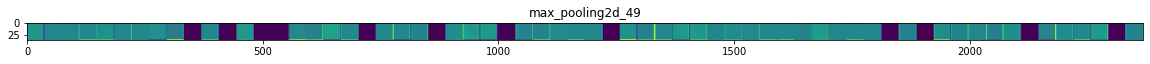

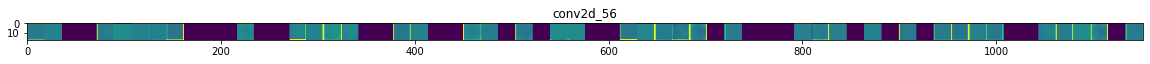

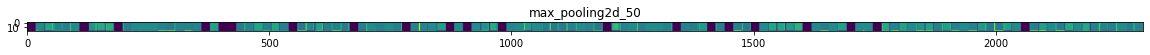

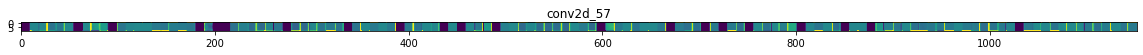

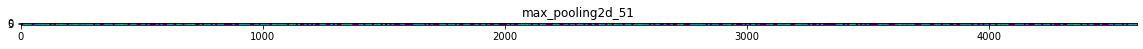

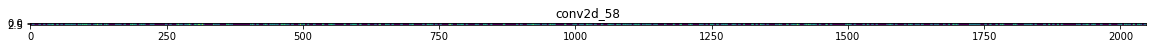

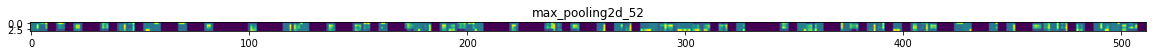

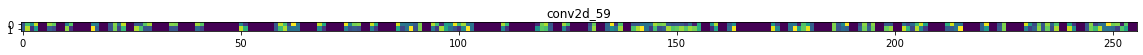

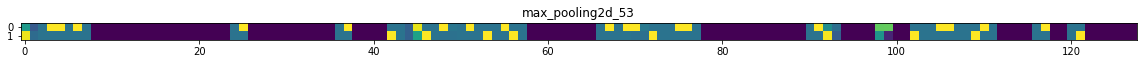

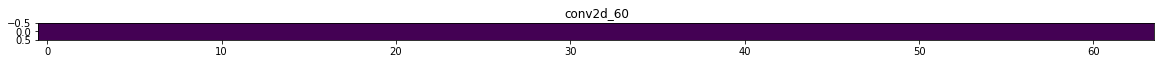

In [232]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

n_img= Normal_Path+ "/3227_right.jpg"


img = load_img(n_img, target_size=(150, 150))  # this is a PIL image

m   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
m   = m.reshape((1,) + m.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
m /= 255.0


successive_feature_maps = visualization_model.predict(m)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]


for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    

    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))


    for i in range(n_features):
      m = feature_map[0, :, :, i]
      m -= m.mean()
      m /= m.std ()
      m *=  64
      m += 128
      m  = np.clip(m, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = m # Tile each filter into a horizontal grid



    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis') 

In [ ]:
#TESTING

In [233]:
import cv2
import tensorflow as tf
import numpy as np
normal_test = '/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/normalTest'
#Test diabetic reiontpathy
CATEGORIES = ["Normal","Diabetic_Retinopathy"]

def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # return the image with s 
 
#45A445$%$%image = image.astype(np.uint8)
prediction = model.predict([prepare(normal_test+'/3346_right.jpg')])

print(prediction)  # will be a list in a list.

#Normal

[[0.00591722]]


In [234]:
import cv2
import tensorflow as tf
import numpy as np
dr_test = '/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/diabetesTest'
#Test diabetic reiontpathy
CATEGORIES = ["Normal","Diabetic_Retinopathy"]

def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # return the image with s 
 
#45A445$%$%image = image.astype(np.uint8)
prediction = model.predict([prepare(dr_test+'/4683_right.jpg')])

print(prediction)  # will be a list in a list.


#Diabetic retinopathy

[[0.9986367]]


In [235]:
import cv2
import tensorflow as tf
import numpy as np
dr_test = '/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/diabetesTest'
#Test diabetic reiontpathy
CATEGORIES = ["Normal","Diabetic_Retinopathy"]

def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # return the image with s 
 
#45A445$%$%image = image.astype(np.uint8)
prediction = model.predict([prepare(dr_test+'/diabetes.jpg')])

print(prediction)  # will be a list in a list.

#Diabetic retinoopathy

[[0.99629104]]


In [236]:
#Sigmoid is used for binary classification in the Logistic Regression model.

In [238]:
import cv2
import tensorflow as tf
import numpy as np
normal_test = '/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/normalTest'
#Test diabetic reiontpathy
CATEGORIES = ["Normal","Diabetic_Retinopathy"]

def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # return the image with s 
 
#45A445$%$%image = image.astype(np.uint8)
prediction = model.predict([prepare(normal_test+'/4571_left.jpg')])

print(prediction)  # will be a list in a list.

#Normal

[[0.07975048]]


In [ ]:
#No more area udner the curve beach balls. Jus validation accuracy and convlutions 

In [246]:
import cv2
import tensorflow as tf
import numpy as np
dr_test = '/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/diabetesTest'
#Test diabetic reiontpathy
CATEGORIES = ["Normal","Diabetic_Retinopathy"]

def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # return the image with s 
 
#45A445$%$%image = image.astype(np.uint8)
prediction = model.predict([prepare(dr_test+'/288_left.jpg')])

print(prediction)  # will be a list in a list.

#Diabetic retinoopathy

[[0.9953072]]


In [289]:
import cv2
import tensorflow as tf
import numpy as np
normal_test = '/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/normalTest'
#Test diabetic reiontpathy
CATEGORIES = ["Normal","Diabetic_Retinopathy"]

def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # return the image with s 
 
#45A445$%$%image = image.astype(np.uint8)
prediction = model.predict([prepare(normal_test+'/3427_right.jpg')])

print(prediction)  # will be a list in a list.

#Normal

[[0.02123168]]


In [304]:
#Diagnosie 
#MODIFY THE THINGY
#This is myopia, ti gives low percentates
#which shows you that model stacking wil work
#hte model with the hiehst percentage that is the disea
#if there are consistne low that is normal
import cv2
import tensorflow as tf
import numpy as np
m_test = '/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/myopiaTest'
#Check normal
CATEGORIES = ["Normal","Myopia"]

def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # return the image with s 
 
#45A445$%$%image = image.astype(np.uint8)
prediction = model.predict([prepare(m_test+'/1578_right.jpg')])

print(prediction)  # will be a list in a list.

 

[[0.05856156]]


In [279]:
from tensorflow import lite


In [288]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model('normalversusdiabeteretinopathy')
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

6267784

In [272]:
# tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /var/folders/x5/qmfldhr96rqcgxwtq_24n4p40000gn/T/tmp5n7iimgv/assets


INFO:tensorflow:Assets written to: /var/folders/x5/qmfldhr96rqcgxwtq_24n4p40000gn/T/tmp5n7iimgv/assets


In [275]:
# tflite_model_name = TF_LITE_MODEL_FILE_NAME
# open(tflite_model_name, "wb").write(tflite_model)

6269752

In [296]:
class TestModel(tf.Module):
  def __init__(self):
    super(TestModel, self).__init__()

  @tf.function(input_signature=[tf.TensorSpec(shape=[1, 10], dtype=tf.float32)])
  def add(self, x):
    '''
    Simple method that accepts single input 'x' and returns 'x' + 4.
    '''
    # Name the output 'result' for convenience.
    return {'result' : x + 4}


SAVED_MODEL_PATH = 'normalversusdiabeteretinopathy'

TFLITE_FILE_PATH = 'converted_model.tflite'

# Save the model
module = TestModel()
# You can omit the signatures argument and a default signature name will be
# created with name 'serving_default'.
tf.saved_model.save(
    module, SAVED_MODEL_PATH,
    signatures={'my_signature':module.add.get_concrete_function()})

# Convert the model using TFLiteConverter
converter = tf.lite.TFLiteConverter.from_saved_model(SAVED_MODEL_PATH)
tflite_model = converter.convert()
with open(TFLITE_FILE_PATH, 'wb') as f:
  f.write(tflite_model)

# Load the TFLite model in TFLite Interpreter
interpreter = tf.lite.Interpreter(TFLITE_FILE_PATH)
# There is only 1 signature defined in the model,
# so it will return it by default.
# If there are multiple signatures then we can pass the name.
my_signature = interpreter.get_signature_runner()

# my_signature is callable with input as arguments.
output = my_signature(x=tf.constant([1.0], shape=(1,10), dtype=tf.float32))
# 'output' is dictionary with all outputs from the inference.
# In this case we have single output 'result'.
print(output['result'])

INFO:tensorflow:Assets written to: normalversusdiabeteretinopathy/assets


INFO:tensorflow:Assets written to: normalversusdiabeteretinopathy/assets


AttributeError: 'Interpreter' object has no attribute 'get_signature_runner'

In [298]:
# Continue to get tensors and so forth, as shown above...

In [303]:
from tflite_model_maker import configs
from tflite_model_maker import ExportFormat
from tflite_model_maker import image_classifier  
from tflite_model_maker import ImageClassifierDataLoader
from tflite_model_maker import model_spec
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tflite_model_maker'

In [307]:
 import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('normalversusdiabeteretinopathy') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('diabeticretinopathymodel.tflite', 'wb') as f:
    f.write(tflite_model)